In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
#from random import randint
import math
import heapq
import pickle as pkl
import time

In [3]:
A = nx.to_numpy_matrix(G, dtype=np.bool)
#fig = plt.figure(figsize=(5, 5))
#plt.imshow(A,cmap="Greys",interpolation="none")   
sns.heatmap(A, cmap = "Blues")

NameError: name 'G' is not defined

In [ ]:
np.all(A.T==A)

In [4]:
np.average(np.sum(A,1))

NameError: name 'A' is not defined

In [30]:
A=nx.adjacency_matrix(G)

# This is where it starts

In [18]:
clear all

In [3]:
def avalanche(x,A,f,N):

    count = 0
    degree = np.array(np.sum(A,0))[0]
    degree = np.reshape(degree, (N,1))
    xc = np.reshape(degree + (degree==0), (N,1))
    spikes = np.multiply(x>=xc, 1)
    ava = spikes.copy()
    while np.sum(np.multiply(degree,spikes))> 0:
        ava = np.multiply((ava+spikes)>0,1)
        spikes = np.multiply(x>=degree, 1)
        spikes = np.reshape(spikes,(N,1))
        x = x + A*spikes
        x = x - np.multiply(spikes,degree)
        #x = x - (np.random.rand(N,1)>f)
        x = np.multiply(x,(x>0))
        count = count + 1

    return [x,ava]

In [4]:
def plot_A(A):
    fig = plt.figure(figsize=(5, 5))
    plt.title("Adjacency Matrix")
    #plt.imshow(A,cmap="Greys",interpolation="none")   
    %matplotlib inline
    sns.heatmap(A, cmap="Greys")
    plt.show()
    plt.close("all")

In [5]:
def my_kmax(R,k):
    N = len(R)
    f = np.ravel(R)
    #print(f)
    indices = np.array(heapq.nlargest(k, range(len(f)), f.__getitem__))
    j = np.mod(indices,N)
    i = np.floor(indices/N)
    #print(indices)
    return [i,j]

In [9]:
N = 2000
f = 0.01 #f leak (fraction of leak)
f = 1-f
mean_degree = 4

K = 4
steps = 10
#tic
np.random.seed(1)
G_undir = nx.erdos_renyi_graph(N,mean_degree/N)
G_dir = nx.DiGraph()
G_dir.add_nodes_from(range(N))
G_dir.add_edges_from(G_undir.edges())


A = nx.to_numpy_matrix(G_dir.to_undirected(), dtype=np.int)
#fig = plt.figure(figsize=(5, 5))
#plt.title("Adjacency Matrix")
#plt.imshow(A,cmap="Greys",interpolation="none")   
#%matplotlib inline
#sns.heatmap(A, cmap="Greys")
#plt.show()

#storex = np.zeros((N,steps))
#storex_noava = np.zeros((N,steps))

temp = np.arange(0,2*G_undir.number_of_edges())
R = [(temp[2*i],temp[2*i+1]) for i in range(G_undir.number_of_edges())]
recency={}
for edge,rec in zip(G_dir.edges(),R):
    recency[edge]=rec
nx.set_edge_attributes(G_dir,recency,name="recency")
#R = temp.reshape(N,N)
#R = np.multiply(R,A)

A_ini = A.copy()
degree = np.array(np.sum(A,0))[0]
G_undir.clear()
del(R)
del(temp)
del(recency)

In [12]:
#G_dir.edges(data=True)

In [145]:
G_dir.add_edge(0,4,recency=(0,0))

In [10]:
G_dir[0][4]['recency']

KeyError: 4

In [17]:
G=nx.DiGraph()
G.add_nodes_from(range(100))
G.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99))

In [19]:
len(A)

500

In [22]:
max((1,5))

5

In [ ]:
#Initial State
x = np.zeros((N,1));
for i in range(N):
    if degree[i]>0:
        np.random.seed(1)
        x[i]=np.random.randint(0,degree[i])
    else:
        x[i]=0
        
xb = x

count = 0
xsave = [0]*steps

save_distribution = []

for i in range(steps):
    if np.mod(i,steps/10) == 0:
        dist = np.bincount(list(degree.flat))
        #x_axis = np.arange(0,max(degree)+1)
        save_distribution.append((dist,degree))
        
    #Particle addition
    
    add_site = np.random.randint(0,N-1)

    x[add_site] = x[add_site] + 1

    #Avalanche processing
    degree = np.array(np.sum(A,0))[0]
    degree = np.reshape(degree, (N,1))
    xc = np.reshape(degree + (degree==0), (N,1))
    spikes = np.multiply(x>=xc, 1)
    ava = spikes.copy()
    temp1 = np.zeros((N,1))
    if np.sum(np.multiply(degree,spikes))>0: 
        [x,temp1] = avalanche(x,A,f,N)
        x = x - (np.random.rand(N,1)>f)
        count = count + 1
    ava = np.multiply((ava+temp1)>0,1)
    xsave[i] = x
    a = np.sum(ava)
    
        
    
    ##Rewiring
    
    #R = np.multiply(R,A)
    #Ruse = R.copy()
    """
    for c1 in range(N):
        for c2 in range(N):
            if Ruse[c1,c2] <= Ruse[c2,c1]:
                Ruse[c1,c2] = -1
            else:
                Ruse[c2,c1] = -1

    ie,je = my_kmax(Ruse,a)
    #"""
    if a!=0:
        edges=list(G_dir.edges())
        R=[max(G_dir[edge[0]][edge[1]]['recency']) for edge in edges] #takes maximum of the two endpoints for each edge
        indices = np.array(heapq.nlargest(a, range(len(R)), R.__getitem__))
        ie,je=tuple(zip(*[edges[i] for i in indices]))

    for j in range(a):
        #if (je[j] != add_site) & (A[int(ie[j]),int(je[j])] != 0) & (A[add_site,je[j]] == 0): second condition will be true
        if (je[j] != add_site) & ((add_site,je[j]) not in G_dir.to_undirected().edges()):
            #print('hi')
            #A[int(ie[j]),int(je[j])] = 0
            #A[int(je[j]),int(ie[j])] = 0
            #A[add_site,je[j]] = 1
            #A[je[j],add_site] = 1
            if (ie[j],je[j]) in G_dir.edges():
                r=G_dir[ie[j]][je[j]]['recency'][1]
                G_dir.remove_edge(ie[j],je[j])
                G_dir.add_edge(add_site,je[j],recency=(0,r))
            else:
                r=G_dir[je[j]][ie[j]]['recency'][0]
                G_dir.remove_edge(je[j],ie[j])
                G.add_edge(je[j],add_site,recency=(r,0))
            
            #R = np.multiply((R+1),A)
            #this part looks ugly
            for edge in G_dir.edges():
                r=G_dir[edge[0]][edge[1]]['recency']
                G_dir[edge[0]][edge[1]]['recency']=(r[0]+1,r[1]+1)
    
    A = nx.to_numpy_matrix(G_dir.to_undirected(), dtype=np.int)  
    print("Step:",i)
    #print("Edges:",np.sum(np.sum(A))/2)

Step: 0
Step: 1
Step: 2


In [80]:
#better c1 c2 procedure
max_endpoints=[]
max_endpoints_r=[]
for edge in G.edges():
    c1,c2=edge
    if R[c1,c2] <= R[c2,c1]:
        max_endpoints.append((c1,c2))
        max_endpoints_r.append(R[c1,c2])
    else:
        max_endpoints.append((c2,c1))
        max_endpoints_r.append(R[c2,c1])
    
indices = np.array(heapq.nlargest(10, range(len(max_endpoints_r)), max_endpoints_r.__getitem__))
i,j=tuple(zip(*[max_endpoints[i] for i in indices]))

In [81]:
print(i,j)

(189, 187, 186, 186, 183, 181, 180, 174, 174, 171) (190, 198, 197, 189, 194, 195, 199, 188, 175, 192)


/home/kabir/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


ValueError: x and y must have same first dimension, but have shapes (50,) and (12,)

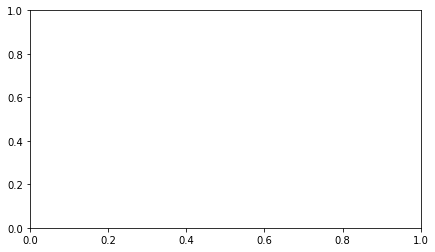

In [38]:
%matplotlib inline
for dist in save_distribution:
    
    fig = plt.figure(figsize=(7, 4))
    plt.plot(np.log(list(range(len(dist))),np.log(dist))

In [45]:
with open("/home/kabir/SOC_model/data.pkl",'rb') as pickle_file:
    data=pkl.load(pickle_file)
"""%matplotlib inline
for dist in save_distribution:
    
    fig = plt.figure(figsize=(7, 4))
    plt.plot(np.log(list(range(len(dist))),np.log(dist))"""

UnicodeDecodeError: 'ascii' codec can't decode byte 0xc8 in position 0: ordinal not in range(128)

In [23]:
plt.close("all")

In [57]:
l=[max(e) for e in G.edges()]
np.array(heapq.nlargest(10, range(len(l)), l.__getitem__))

array([261, 264, 341, 365, 395, 398, 205, 399, 414, 431])

In [67]:
#PLOTTING DEG DIST

#degree = list(ele.item(0) for ele in degree)
#temp = np.bincount(degree)
#x_axis = np.arange(0,max(degree)+1)
#plt.ylabel("Frequency")
#plt.xlabel("Degree")
#plt.loglog(x_axis,temp)


In [69]:
i

2506

In [72]:
np.count_nonzero(A)

2006

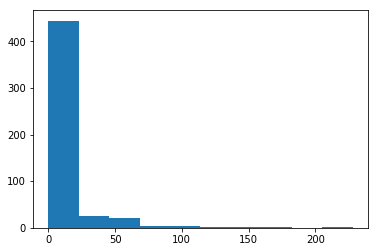

In [94]:
import matplotlib.pyplot as plt
import networkx as nx

def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees)
    plt.show()

plot_degree_dist(nx.DiGraph(A))

In [79]:
degrees = [G.degree(n) for n in G.nodes()]
len(degrees)

500

In [137]:
%matplotlib

temp = np.bincount(degrees)
x_axis = np.arange(0,max(degrees)+1)
plt.ylabel("Frequency")
plt.xlabel("Degree")

plt.scatter(x_axis,temp)
plt.plot(x_axis,temp)
plt.xscale('linear')
plt.yscale('linear')
plt.show()

Using matplotlib backend: Qt5Agg


In [134]:
max(degrees)+1

12

In [115]:
np.where(np.array(degrees) == 2)[0].shape

(70,)

In [112]:
temp

array([  6,  38,  70, 101, 109,  71,  51,  26,  15,   5,   7,   1], dtype=int64)

In [316]:
# rewiring 
R = np.multiply(R,A)
Ruse = R
for c1 in range(N):
    for c2 in range(N):
        if Ruse[c1,c2] <= Ruse[c2,c1]:
            Ruse[c1,c2] = -1
        else:
            Ruse[c2,c1] = -1
            
            
B = np.array(np.ndarray.flatten(Ruse))
B = np.transpose(B)

indices = np.argpartition(B.transpose()[0], -a)[-a:] # maxk function


v = indices
ie = np.floor((v-1)/N) 
je = np.fmod(v,N) - 1
for vv in range(a):
    if v[vv] == 0:
        je[vv] = 0

for j in range(a):
    if (je[j] != add_site) & (A[int(ie[j]),int(je[j])]) != 0 & (A[add_site,je[j]] == 0):
        A[int(ie[j]),int(je[j])] = 0
        A[int(je[j]),int(ie[j])] = 0
        
        A[add_site,je[j]] = 1
        A[je[j],add_site] = 1
        
        R = np.multiply((R+1),A)
    

In [321]:
for j in range(a):
    if (je[j] != add_site) & (A[int(ie[j]),int(je[j])]) != 0 & (A[add_site,je[j]] == 0):
        A[int(ie[j]),int(je[j])] = 0
        A[int(je[j]),int(ie[j])] = 0
        
        A[add_site,je[j]] = 1
        A[je[j],add_site] = 1
        
        R = np.multiply((R+1),A)
    

In [317]:
j = 
(je[j] != add_site) & (A[int(ie[j]-1),int(je[j]-1)]) != 0 & (A[add_site,je[j]] == 0)

False

In [310]:
(je[j] != add_site)

True

In [315]:
a = 10

In [322]:
R

matrix([[  0,   1,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,
           1,   0,   0,   0,   0,   0,   0],
        [  2,   0,   0,   0,   0,   0,   0,   1,   1,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   1],
        [  0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   1,   0,   1,   0,   0,   0,   1,   0,   1,
           0,   0,   0,   1,   0,   0,   0],
        [  0,   0,   0,  85,   0,   1,   0,   0,   1,   0,   0,   1,   0,
           0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0, 106,   0,   1,   0,   0,   0,   0,   0,   0,
           1,   1,   0,   0,   0,   0,   0],
        [122,   0,   0, 125,   0, 127,   0,   1,   0,   1,   0,   0,   1,
           0,   0,   0,   0,   0,   0,   1],
        [  0, 143, 144,   0,   0,   0, 148,   0,   0,   0,   0,   0,   0,
           0,   0,   1,   0,   0,   0,   0],
        [  0,   1,   0,   0, 166,   0,   0,   0,

In [289]:
je = np.fmod(v,N) - 1
for vv in range(a):
    if v[vv] == 0:
        je[vv] = 0
    else:    
        je[vv] = je[vv] + N

In [303]:
je = np.fmod(v,N) - 1

In [306]:
je

array([ 7,  8, 16])

In [286]:
vv=0
v[vv] == -1

False

In [195]:
je = je + np.multiply(N,np.multiply(je==0,1))

In [129]:
y = np.array([1,2,10, 110 ,1,1,1,2,3,4,5,6])
n = 1
print(np.argsort(y)[-n:])
y[np.argsort(y)[-n:]]

[3]


array([110])

In [122]:
ind = np.argpartition(y, -n)[-n:]

In [125]:
ind

array([ 9, 10, 11,  2,  3])

In [127]:
a

1

In [34]:
a = np.sum(ava)i

SyntaxError: invalid syntax (<ipython-input-34-e26a7d5cbfb8>, line 1)

array([[[1., 1., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 2., 2., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.],
        [1., 1., 1., ..., 1., 1., 0.]]])

In [474]:
%matplotlib
plt.plot(np.reshape(xsave, (10000, 20))[-200:,:], linewidth = 10)

Using matplotlib backend: Qt5Agg


ValueError: cannot reshape array of size 5000 into shape (10000,20)

In [59]:
degree

array([[3],
       [2],
       [1],
       [5],
       [4],
       [4],
       [7],
       [4],
       [3],
       [3],
       [4],
       [4],
       [4],
       [3],
       [5],
       [3],
       [2],
       [2],
       [1],
       [6]])

In [89]:
#Initial State
x=np.zeros((N,1));
for i in range(N):
    if degree[i]>0:
        x[i]=np.random.randint(0,degree[i])
    else:
        x[i]=0
        
##Particle addition
xb = x
add_site = np.random.randint(0,N-1)
x[add_site] = x[add_site] + 1
print(x.shape)
        
count = 1
degree = np.array(np.sum(A,0))[0]
x_critical = degree + (degree==0)
spikes = (x>=x_critical)
ava = spikes

(10, 1)


In [59]:
#Avalanche processing
degree = np.array(np.sum(A,0))[0]
spikes = np.zeros((N,1))
xc = degree + (degree==0)
spikes[np.where(x>=xc)[0]] = 1
ava = spikes
temp1 = np.zeros((N,1))

(10, 1)

In [ ]:
if np.sum(np.multiply(degree,spikes)) > 0: 
    count = 0
    degree = np.array(np.sum(A,0))[0]
    x_critical = degree + (degree==0)
    spikes = (x>=x_critical)
    ava = spikes
    while np.sum(np.multiply(degree,spikes))>0:
        ava = np.multiply(((ava + spikes)>0),1)
        spikes = np.multiply((x>=degree),1)
        spikes = np.reshape(spikes.transpose(), (10,1))

        x = x + A*spikes
        x = x - np.multiply(spikes,degree)
        x = x - (np.random.rand(N,1)>f)
        x = np.multiply(x,(x>0))
    #storextemp(:,count)=x;
        count = count+1
        #count = count + 1

#ava=(ava+temp1)>0;
#a=sum(ava);

In [62]:
x

array([[2.],
       [1.],
       [4.],
       [2.],
       [0.],
       [1.],
       [3.],
       [2.],
       [0.],
       [4.]])

In [91]:
count = 0
degree = np.array(np.sum(A,0))[0]
degree = np.reshape(degree, (N,1))
xc = np.reshape(degree + (degree==0), (N,1))
spikes = np.multiply(x>=xc, 1)
ava = spikes
while np.sum(np.multiply(degree,spikes))> 0:
    ava = np.multiply((ava+spikes)>0,1)
    spikes = np.multiply(x>=degree, 1)
    spikes = np.reshape(spikes,(N,1))
    x = x + A*spikes
    x = x - np.multiply(spikes,degree)
    x = x - (np.random.rand(N,1)>f)
    x = np.multiply(x,(x>0))
    count = count + 1

In [94]:
spikes[1] = 1

In [92]:
count

0

In [88]:
np.sum(np.multiply(degree,spikes))

0

In [72]:
x

array([[2.],
       [2.],
       [1.],
       [2.],
       [0.],
       [6.],
       [1.],
       [2.],
       [0.],
       [1.]])

10

In [361]:
spikes

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [93]:
x

array([1, 2])

In [97]:
a=np.array([[10,0],[1,10]])
np.dot(a,np.array([5,0]))

array([50,  5])